**Integrantes:**
- Andrés Eduardo Cristancho Rincón
- Danna Pauleth Lopez Acosta

In [ ]:
# DATOS

API_KEY = "RGAPI-afe08a42-c848-46e8-a602-96515b4748d6"

alias = "Aincradstyle16"
tag = "LAN"

# Cuenta: https://developer.riotgames.com/apis#account-v1
# Invocador: https://developer.riotgames.com/apis#summoner-v4
# Partidas: https://developer.riotgames.com/apis#match-v5

In [ ]:
# @title ## Info

import pandas as pd
import requests

# Cuenta
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{alias}/{tag}?api_key={API_KEY}"
peticion = requests.get (url)
respuesta = peticion.json ()

puuid = respuesta ["puuid"]

print (f"Alias: {alias}")
print (f"Tag: #{tag}")
print (f"Puuid: {puuid}")
print ()

# Invocador
url = f"https://la1.api.riotgames.com/lol/summoner/v4/summoners/by-puuid/{puuid}?api_key={API_KEY}"
peticion = requests.get (url)
respuesta = peticion.json ()

cuenta_id = respuesta ["accountId"]
invocador_id = respuesta ["id"]
invocador_nivel = respuesta ["summonerLevel"]

print (f"Cuenta id: {cuenta_id}")
print (f"Invocador id: {invocador_id}")
print (f"Invocador nivel: {invocador_nivel}")


Alias: Aincradstyle16
Tag: #LAN
Puuid: YtU-XF5zSeNh9BkcmVqM0UVzdOXyF_hZkF07XXbumSbYWkGWaZY0ixfrhv18B-TX8O4EF7NbKPbU7Q

Cuenta id: aHTLMexdHuaAUvS5p67dyGyQGSUT8zweNzDXNzfQakQx5okucYJPKrA8
Invocador id: kjg7izA_JKl6A7xChNCQWefqK1NtoQHvhqgFlBSUbLks_yk
Invocador nivel: 385


In [ ]:
# @title ## Partidas

def formatear_partida (partida):
    metadata = partida ["metadata"]
    info = partida ["info"]

    indice = metadata ["participants"].index (puuid)
    jugador = info ["participants"][indice]
    assert jugador ["puuid"] == puuid, "No son iguales"

    return {
        # Partida
        # "endOfGameResult": info ["endOfGameResult"],
        "gameCreation": info ["gameCreation"],
        "gameDuration": info ["gameDuration"],
        # "gameEndTimestamp": info ["gameEndTimestamp"],
        "gameId": info ["gameId"],
        "gameMode": info ["gameMode"],
        # "gameName": info ["gameName"],
        # "gameStartTimestamp": info ["gameStartTimestamp"],
        # "gameType": info ["gameType"],
        # "gameVersion": info ["gameVersion"],
        # "mapId": info ["mapId"],
        # "platformId": info ["platformId"],
        # "queueId": info ["queueId"],
        "tournamentCode": info ["tournamentCode"],

        # Equipo
        # "teamEarlySurrendered": jugador ["teamEarlySurrendered"],
        "win": jugador ["win"],

        # Jugador
        "championName": jugador ["championName"],
        "role": jugador ["role"],
        "assists": jugador ["assists"],
        "champExperience": jugador ["champExperience"],
        "champLevel": jugador ["champLevel"],
        "deaths": jugador ["deaths"],
        "kills": jugador ["kills"],
        "doubleKills": jugador ["doubleKills"],
        "tripleKills": jugador ["tripleKills"],
        "killingSprees": jugador ["killingSprees"],
        "pentaKills": jugador ["pentaKills"],
        "longestTimeSpentLiving": jugador ["longestTimeSpentLiving"],
        "totalDamageTaken": jugador ["totalDamageTaken"],
        "totalHeal": jugador ["totalHeal"],

        # Adicionales
        "goldEarned": jugador ["goldEarned"],
        "goldSpent": jugador ["goldSpent"],
        "itemsPurchased": jugador ["itemsPurchased"]
    }

def obtener_partida (id):
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{id}?api_key={API_KEY}"
    peticion = requests.get (url)
    respuesta = peticion.json ()

    return respuesta

def obtener_partidas ():
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=100&api_key={API_KEY}"
    peticion = requests.get (url)
    respuesta = peticion.json ()

    return respuesta

def formatear_partidas (db):
    partidas = []
    for partida_id in db:
        try:
            partida = obtener_partida (partida_id)
            partida = formatear_partida (partida)
        except:
            continue

        partidas.append (partida)

    return partidas

# db = obtener_partidas ()
# partidas = formatear_partidas (db)

# partidas = pd.DataFrame (partidas)
# partidas.to_csv ("partidas.csv")

In [ ]:
# @title ## Actualizar Partidas

import pandas as pd
import numpy as np

def actualizar_partidas (db):
    partidas_nuevas = []
    for id in db:
        id_num = float (id.split("_") [1])

        if (partidas ['gameId'] == id_num).any ():
            continue

        partidas_nuevas.append (id)

    return partidas_nuevas

partidas = pd.read_csv ("partidas.csv")
partidas = partidas.drop (columns = ["Unnamed: 0"])

db = obtener_partidas ()
print (db)
assert type (db) != "<class 'list'>", "No descargado"
partidas_nuevas = actualizar_partidas (db)
print (f"Partidas faltantes:{partidas_nuevas}")
partidas_nuevas = formatear_partidas (partidas_nuevas)

partidas_nuevas = pd.DataFrame (partidas_nuevas)
partidas = pd.concat ([partidas, partidas_nuevas])
partidas = partidas.sort_values (by = "gameId", ascending = False)
partidas = partidas.reset_index ()
partidas = partidas.drop (columns = ["index"])

partidas.to_csv ("partidas_join.csv")

['LA1_1622121931', 'LA1_1622119652', 'LA1_1622116902', 'LA1_1621931762', 'LA1_1621925571', 'LA1_1621919502', 'LA1_1621694520', 'LA1_1621690247', 'LA1_1621686081', 'LA1_1621680654', 'LA1_1620707250', 'LA1_1620702680', 'LA1_1620669620', 'LA1_1620625111', 'LA1_1620615966', 'LA1_1620607461', 'LA1_1620590933', 'LA1_1620573584', 'LA1_1620558139', 'LA1_1620398320', 'LA1_1620213044', 'LA1_1619885534', 'LA1_1619878774', 'LA1_1619875374', 'LA1_1619706762', 'LA1_1619698598', 'LA1_1619666812', 'LA1_1619664274', 'LA1_1619657477', 'LA1_1619479333', 'LA1_1619472367', 'LA1_1619463685', 'LA1_1619247692', 'LA1_1619240188', 'LA1_1619215796', 'LA1_1619169914', 'LA1_1619170731', 'LA1_1619165904', 'LA1_1619164358', 'LA1_1619155069', 'LA1_1619152518', 'LA1_1619142725', 'LA1_1619136678', 'LA1_1618984669', 'LA1_1618977080', 'LA1_1618968287', 'LA1_1618955405', 'LA1_1618944883', 'LA1_1618941222', 'LA1_1618542212', 'LA1_1618534573', 'LA1_1618506873', 'LA1_1618503524', 'LA1_1618077500', 'LA1_1618072420', 'LA1_1617

In [ ]:
partidas.to_excel("partidas.xlsx")

General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              277 non-null    int64  
 1   gameCreation            277 non-null    int64  
 2   gameDuration            277 non-null    int64  
 3   gameId                  277 non-null    int64  
 4   gameMode                277 non-null    object 
 5   tournamentCode          0 non-null      float64
 6   win                     277 non-null    bool   
 7   championName            277 non-null    object 
 8   role                    277 non-null    object 
 9   assists                 277 non-null    int64  
 10  champExperience         277 non-null    int64  
 11  champLevel              277 non-null    int64  
 12  deaths                  277 non-null    int64  
 13  kills                   277 non-null    int64  
 14  doubleKills             277 non-nu

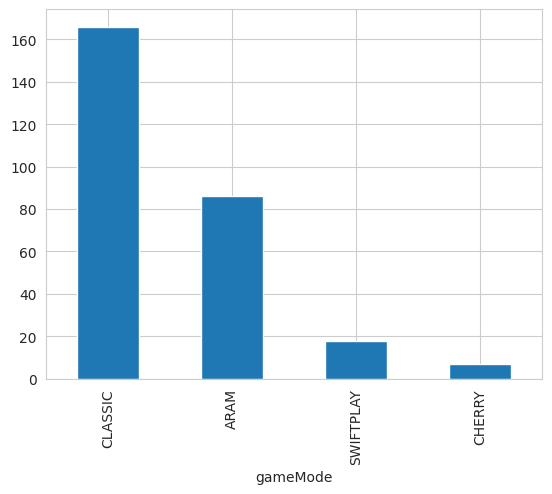

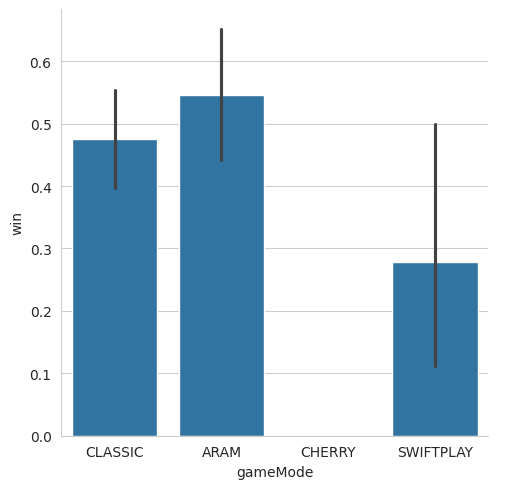

Por campeón, >10
          #  Número de veces jugado  %Victorias
0   Belveth                      10       50.00
1     Diana                      15       33.33
2      Gnar                      50       52.00
3     Kaisa                      13       46.15
4    Lillia                      29       34.48
5      Nami                      10       50.00
6  Volibear                      19       42.11


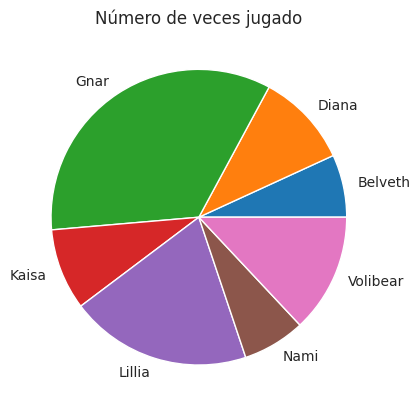

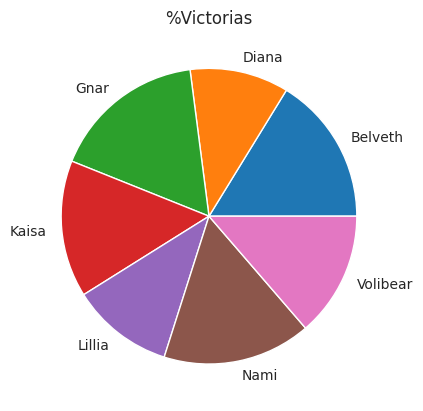

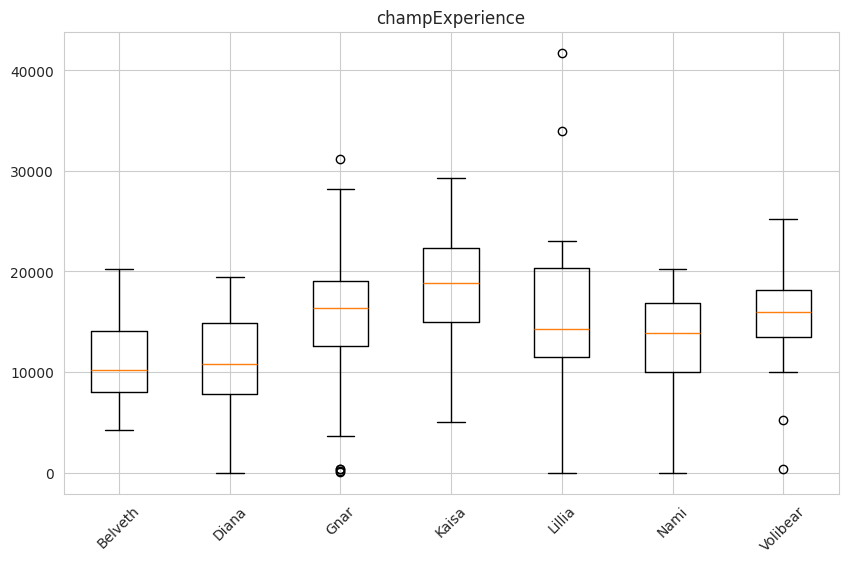

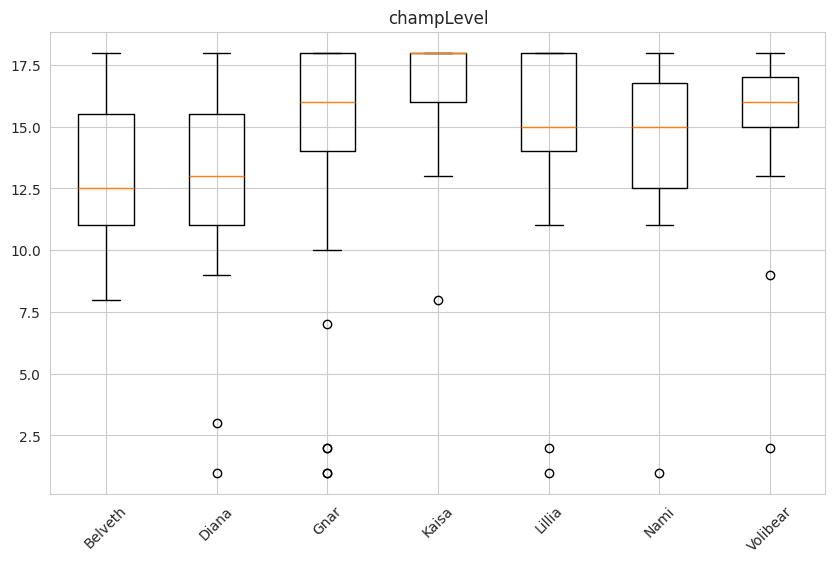

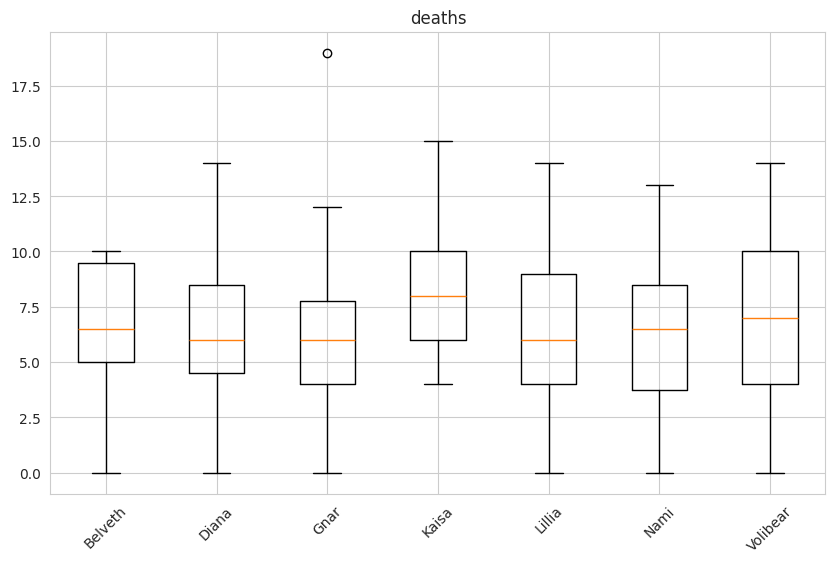

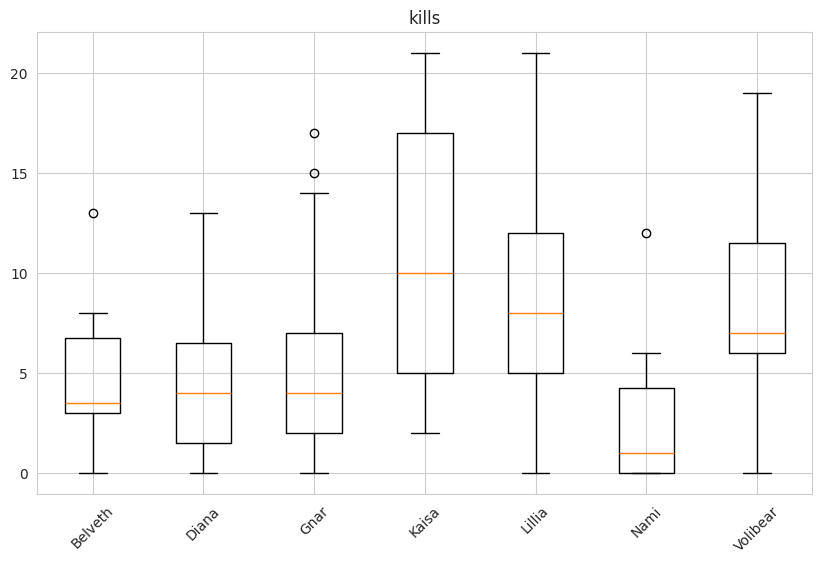

In [2]:
# @title # Datos Generales

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

# Leer
partidas = pd.read_csv ("partidas.csv")
print("General")
partidas.info()
partidas["gameMode"].value_counts().plot(kind="bar")
plt.show()
sns.catplot(data=partidas, x="gameMode", y="win", kind="bar")
plt.show()


# Funciones

def contar (db, label, filtrar = True):
    clases = np.unique (db [label])

    contar = {
        "#": [],
        "Número de veces jugado": [],
        "%Victorias": []
    }

    for clase in clases:
        seleccion = db.loc [db[label] == clase]

        if len (seleccion) < 10:
            continue

        contar["#"].append (clase)
        contar["Número de veces jugado"].append (len (seleccion))
        contar["%Victorias"].append(((seleccion["win"]).mean () * 100).round (2))

    contar = pd.DataFrame (contar)
    print (contar.sort_values(by = ["#"], ascending = True))

    plt.figure (1)
    plt.pie (contar["Número de veces jugado"], labels = contar ["#"])
    plt.title ("Número de veces jugado")
    plt.show ()

    plt.figure (2)
    plt.pie (contar["%Victorias"], labels = contar ["#"])
    plt.title ("%Victorias")
    plt.show ()

def agrupar_boxplot (db, label, columna, filtrar = True):
    clases_nombres = np.unique (db [label])

    clases = []

    for nombre in clases_nombres:
        seleccion = db.loc [db[label] == nombre]

        if len (seleccion) < 10:
            continue

        clases.append ({
            "id": nombre,
            "championName": seleccion ["championName"],
            "gameDuration": seleccion ["gameDuration"],
            "win": (seleccion ["win"]).astype(int),
            "role": seleccion ["role"],
            "assists": seleccion ["assists"],
            "champExperience": seleccion ["champExperience"],
            "champLevel": seleccion ["champLevel"],
            "deaths": seleccion ["deaths"],
            "kills": seleccion ["kills"],
            "contar": seleccion.count ()
        })

    ids = []
    datos = []

    for clase in clases:
        id = clase["id"]
        valores = clase [columna]

        ids.append (id)
        datos.append (valores)

    plt.figure (1, figsize = [10, 6])
    plt.title (columna)
    plt.boxplot (datos)
    plt.xticks(np.arange (1, len(datos)+1, 1), ids, rotation = 45)
    plt.show ()

print("Por campeón, >10")
contar (partidas, "championName")
agrupar_boxplot (partidas, "championName", "champExperience")
agrupar_boxplot (partidas, "championName", "champLevel")
agrupar_boxplot (partidas, "championName", "deaths")
agrupar_boxplot (partidas, "championName", "kills")

<ipython-input-5-f7c8abf1c07f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["gameDatetime"] = pd.to_datetime(df_top["gameCreation"], unit='ms')
<ipython-input-5-f7c8abf1c07f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["dayOfWeek"] = df_top["gameDatetime"].dt.day_name()
<ipython-input-5-f7c8abf1c07f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

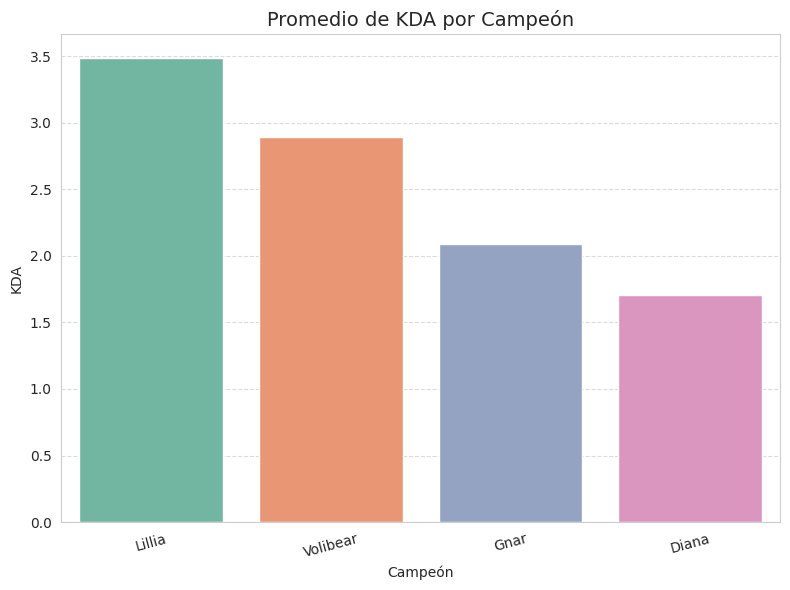

<ipython-input-5-f7c8abf1c07f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gold_stats.values, y=gold_stats.index, palette="Set2")


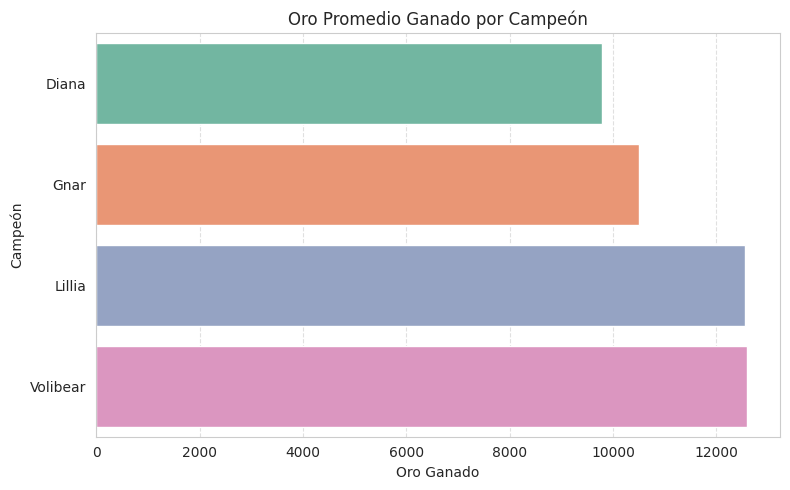

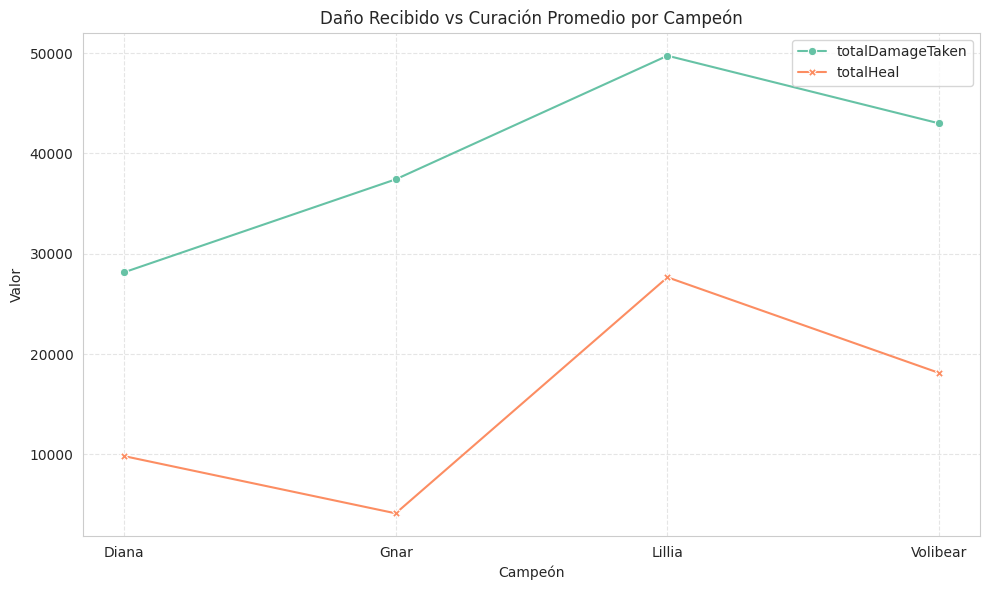

<ipython-input-5-f7c8abf1c07f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winrate.index, y=winrate.values, palette="Set2")


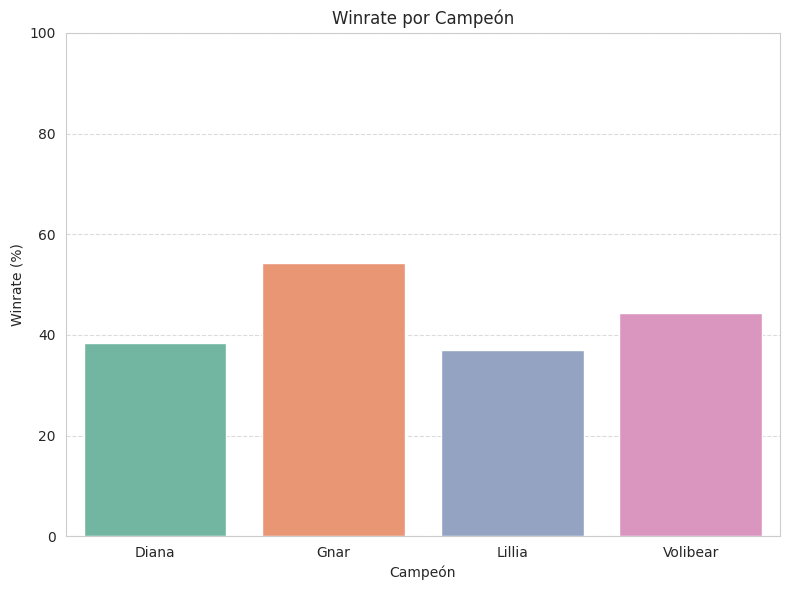

<ipython-input-5-f7c8abf1c07f>:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top, x="championName", y="longestTimeSpentLiving", palette="Set2", ci=None)
<ipython-input-5-f7c8abf1c07f>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="championName", y="longestTimeSpentLiving", palette="Set2", ci=None)


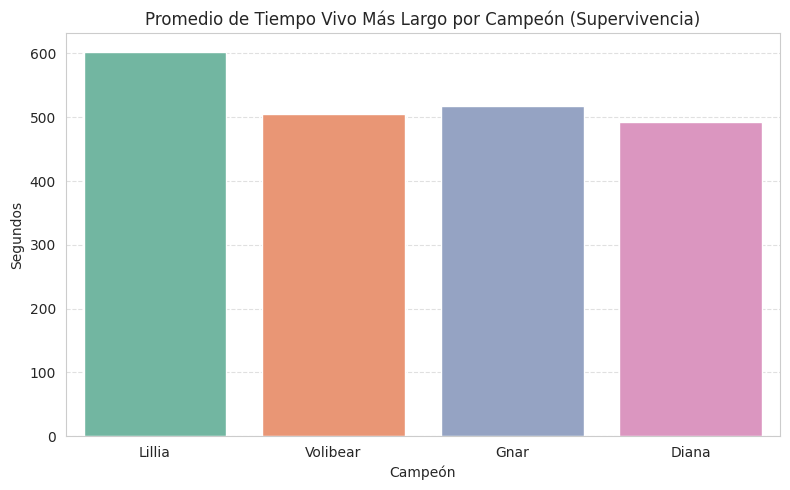

<ipython-input-5-f7c8abf1c07f>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["impact"] = df_top["kills"] + df_top["assists"]
<ipython-input-5-f7c8abf1c07f>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impact_avg.values, y=impact_avg.index, palette="Set2")


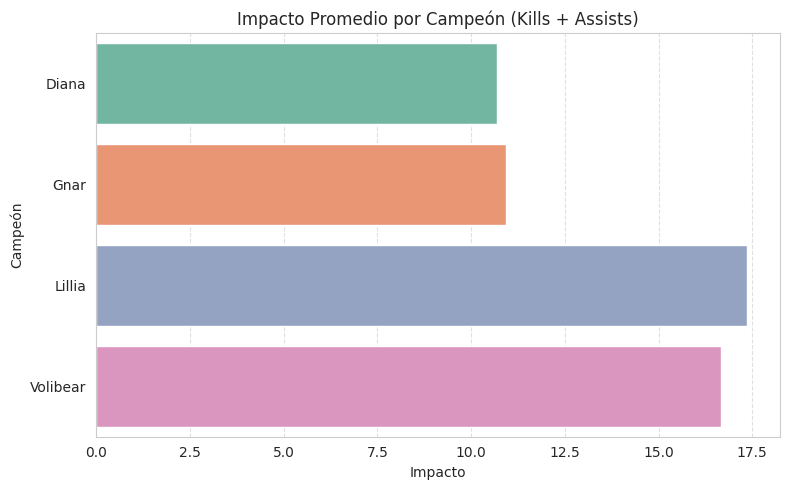

<ipython-input-5-f7c8abf1c07f>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_avg.values, y=deaths_avg.index, palette="Set2")


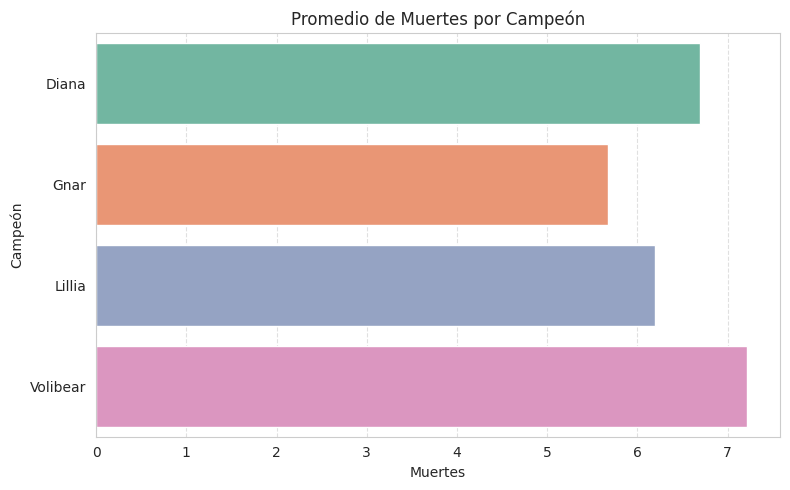

<ipython-input-5-f7c8abf1c07f>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winrate_by_day.index, y=winrate_by_day.values, palette="Set2")


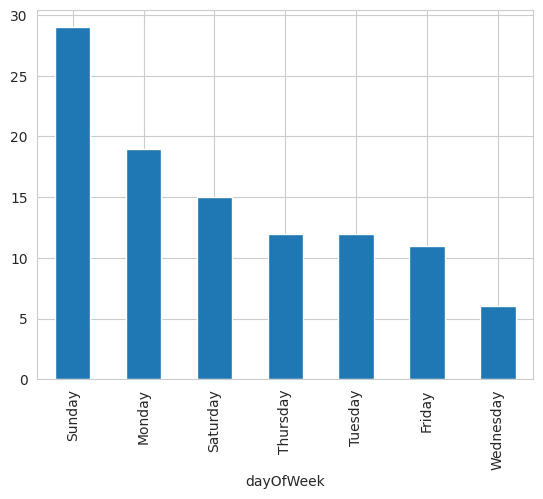

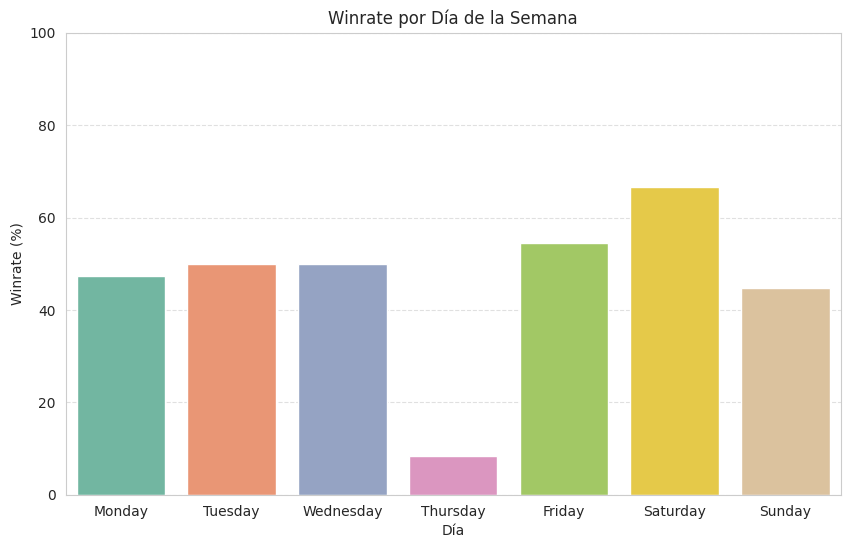

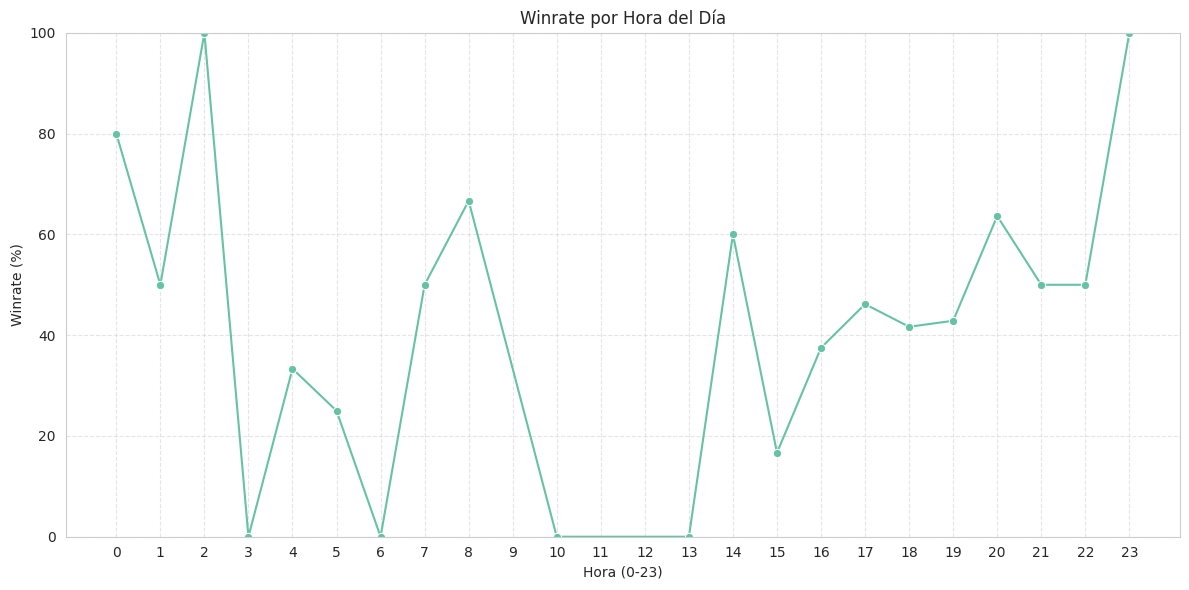

<ipython-input-5-f7c8abf1c07f>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["gameDatetime"] = pd.to_datetime(df_top["gameCreation"], unit='ms')
<ipython-input-5-f7c8abf1c07f>:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["hourOfDay"] = df_top["gameDatetime"].dt.hour


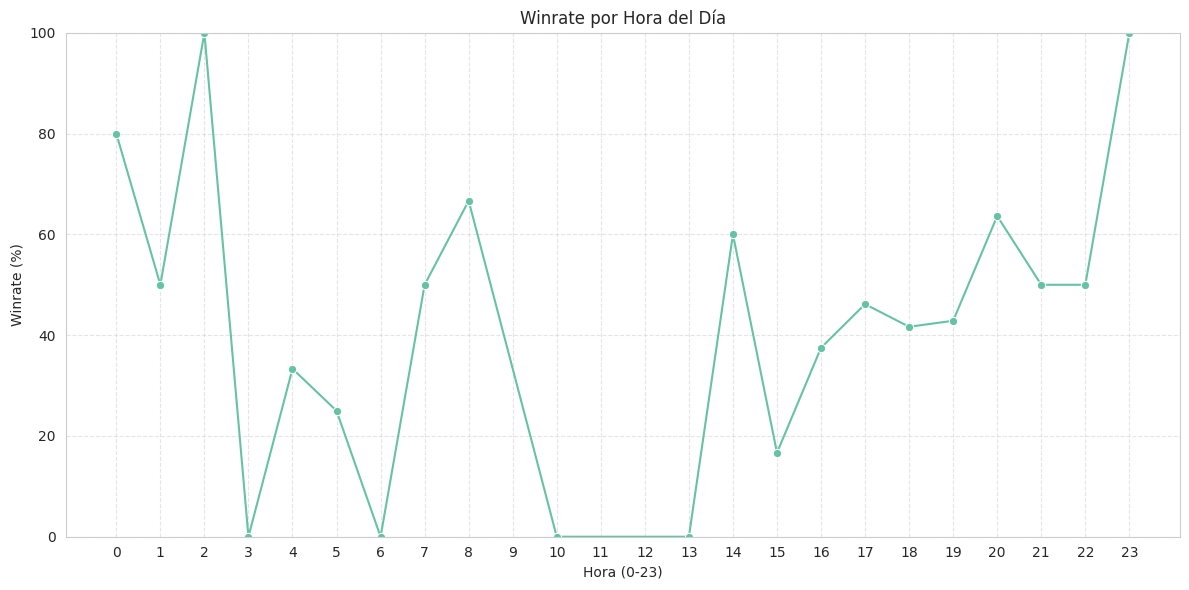

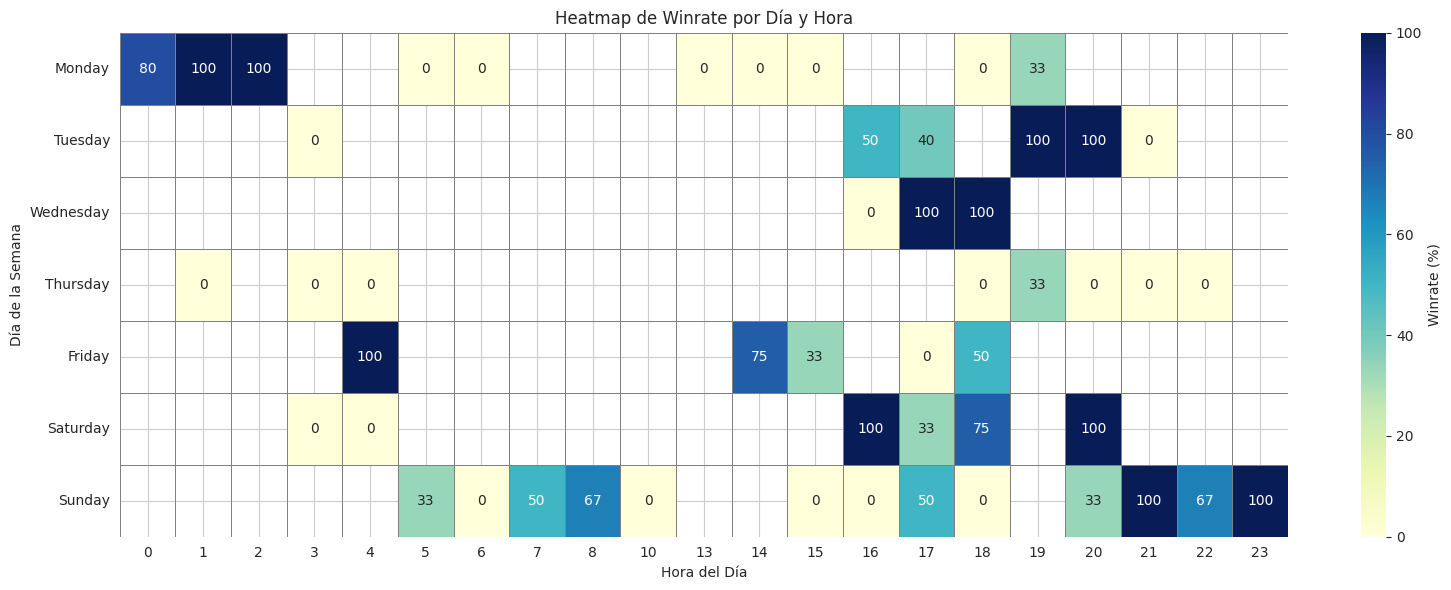

<ipython-input-5-f7c8abf1c07f>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["gameDuration_minutes"] = df_top["gameDuration"] / 60
<ipython-input-5-f7c8abf1c07f>:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["duration_bin"] = pd.cut(df_top["gameDuration_minutes"],
<ipython-input-5-f7c8abf1c07f>:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

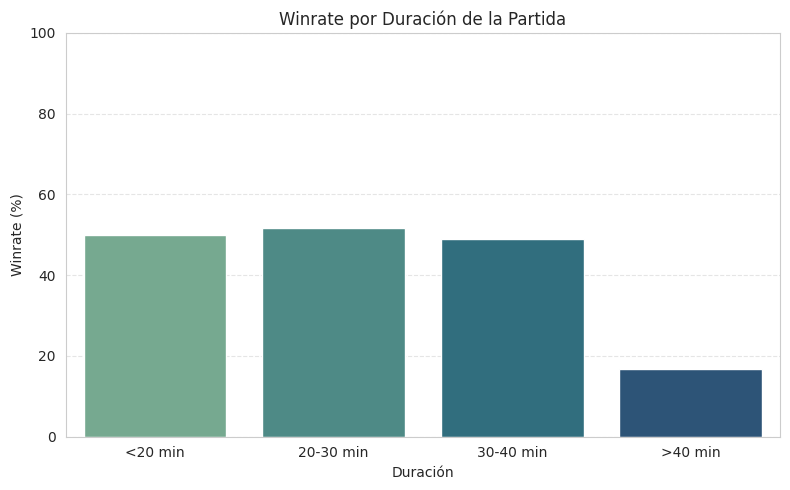

<ipython-input-5-f7c8abf1c07f>:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["gameDuration_minutes"] = df_top["gameDuration"] / 60
<ipython-input-5-f7c8abf1c07f>:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["duration_bin"] = pd.cut(df_top["gameDuration_minutes"],
<ipython-input-5-f7c8abf1c07f>:196: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

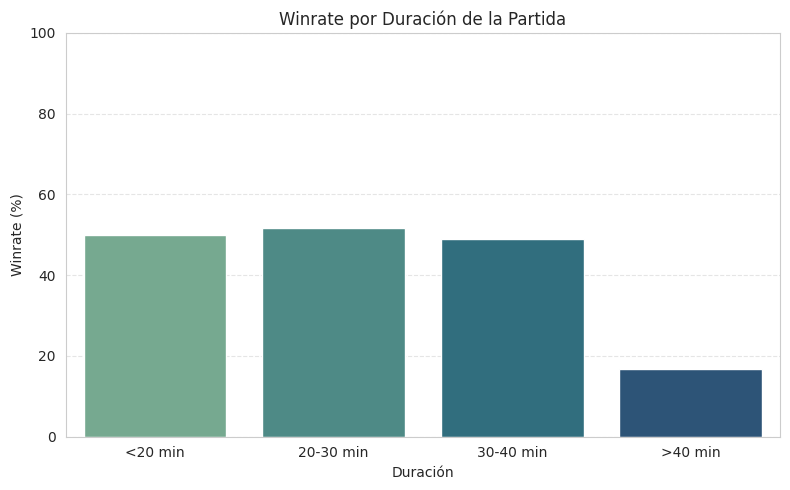

<ipython-input-5-f7c8abf1c07f>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["KDA"] = (df_top["kills"] + df_top["assists"]) / df_top["deaths"].replace(0, 1)
<ipython-input-5-f7c8abf1c07f>:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["KDA_capped"] = df_top["KDA"].apply(lambda x: min(x, 15))
<ipython-input-5-f7c8abf1c07f>:216: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

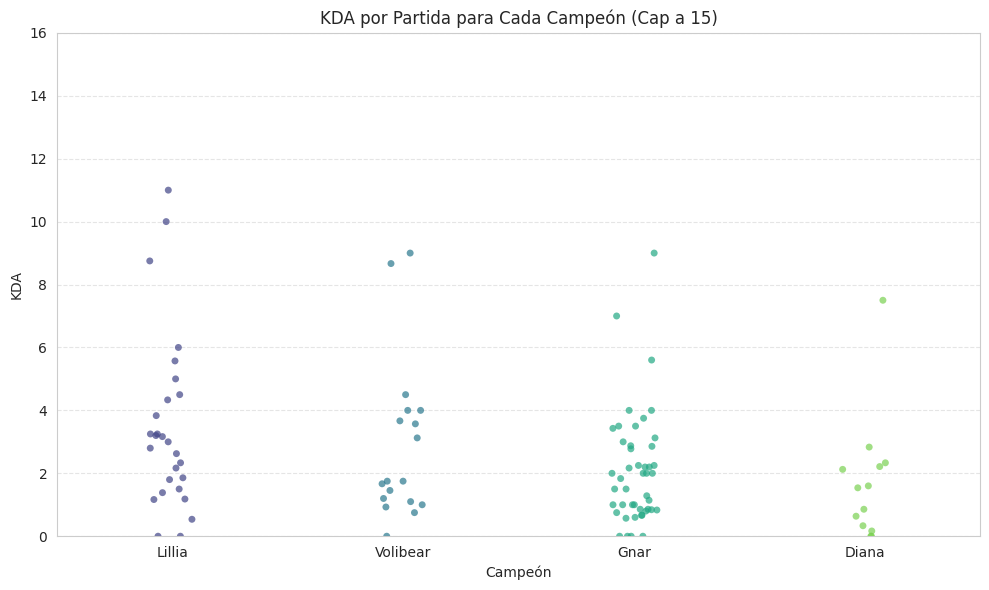

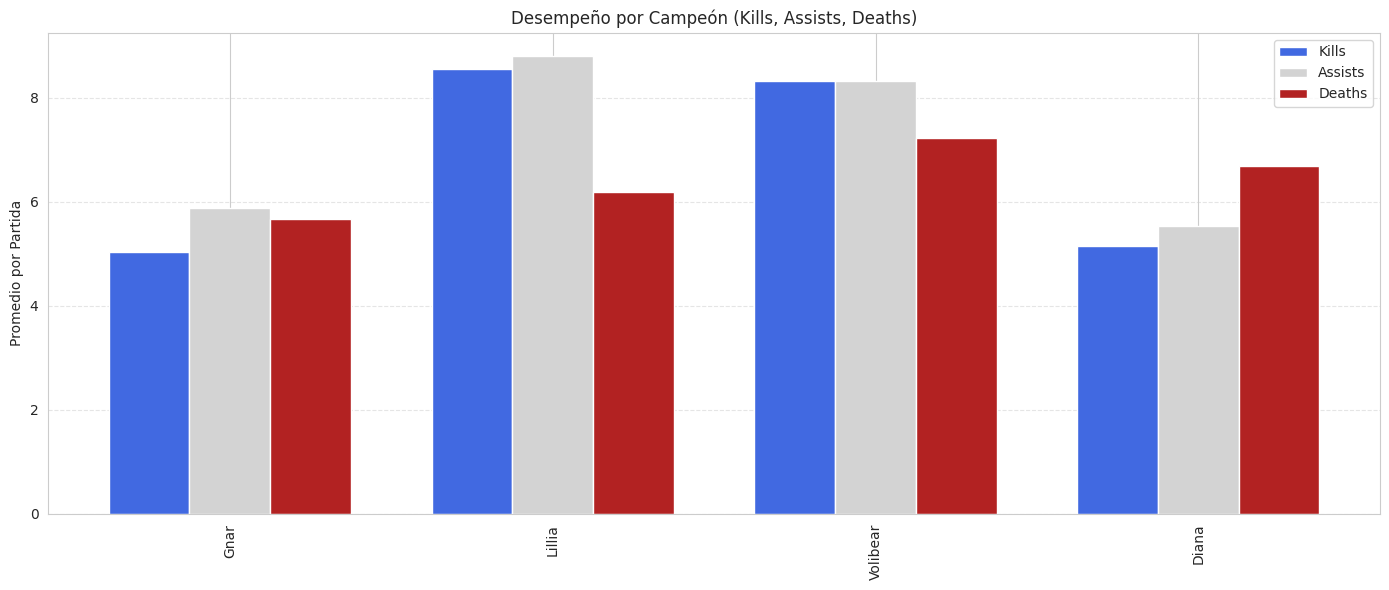

In [5]:
# @title # Datos TOP 4
df_classic = partidas[partidas["gameMode"] == "CLASSIC"]

# Obtener los 4 campeones más jugados
top_4 = df_classic["championName"].value_counts().head(4).index.tolist()

# Filtrar el dataframe para esos campeones
df_top = df_classic[df_classic["championName"].isin(top_4)]

# Mostrar resumen de partidas por campeón
df_top["championName"].value_counts()

# Convertir timestamps a datetime y extraer día/hora
df_top["gameDatetime"] = pd.to_datetime(df_top["gameCreation"], unit='ms')
df_top["dayOfWeek"] = df_top["gameDatetime"].dt.day_name()
df_top["hourOfDay"] = df_top["gameDatetime"].dt.hour

# Calcular estadísticas por campeón
stats = df_top.groupby("championName")[["kills", "deaths", "assists", "goldEarned", "totalDamageTaken", "totalHeal"]].mean()
stats = stats.round(2)
stats

df_top["KDA"] = (df_top["kills"] + df_top["assists"]) / df_top["deaths"].replace(0, 1)

kda_stats = df_top.groupby("championName")["KDA"].mean().round(2)
kda_stats

plt.figure(figsize=(8, 6))
sns.barplot(data=df_top, x="championName", y="KDA", palette="Set2", ci=None)
plt.title("Promedio de KDA por Campeón", fontsize=14)
plt.ylabel("KDA")
plt.xlabel("Campeón")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

gold_stats = df_top.groupby("championName")["goldEarned"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=gold_stats.values, y=gold_stats.index, palette="Set2")
plt.title("Oro Promedio Ganado por Campeón")
plt.xlabel("Oro Ganado")
plt.ylabel("Campeón")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

stats_df = df_top.groupby("championName")[["totalDamageTaken", "totalHeal"]].mean().round(2).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=stats_df.set_index("championName"), markers=True, dashes=False, palette="Set2")
plt.title("Daño Recibido vs Curación Promedio por Campeón")
plt.ylabel("Valor")
plt.xlabel("Campeón")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

winrate = df_top.groupby("championName")["win"].mean() * 100
winrate = winrate.round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x=winrate.index, y=winrate.values, palette="Set2")
plt.title("Winrate por Campeón")
plt.ylabel("Winrate (%)")
plt.xlabel("Campeón")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_top, x="championName", y="longestTimeSpentLiving", palette="Set2", ci=None)
plt.title("Promedio de Tiempo Vivo Más Largo por Campeón (Supervivencia)")
plt.ylabel("Segundos")
plt.xlabel("Campeón")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

df_top["impact"] = df_top["kills"] + df_top["assists"]
impact_avg = df_top.groupby("championName")["impact"].mean().round(2)

plt.figure(figsize=(8, 5))
sns.barplot(x=impact_avg.values, y=impact_avg.index, palette="Set2")
plt.title("Impacto Promedio por Campeón (Kills + Assists)")
plt.xlabel("Impacto")
plt.ylabel("Campeón")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

deaths_avg = df_top.groupby("championName")["deaths"].mean().round(2)

plt.figure(figsize=(8, 5))
sns.barplot(x=deaths_avg.values, y=deaths_avg.index, palette="Set2")
plt.title("Promedio de Muertes por Campeón")
plt.xlabel("Muertes")
plt.ylabel("Campeón")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Calcular winrate por día
df_top["dayOfWeek"].value_counts().plot(kind="bar")
winrate_by_day = df_top.groupby("dayOfWeek")["win"].mean() * 100

# Reordenar los días
dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
winrate_by_day = winrate_by_day.reindex(dias_ordenados)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=winrate_by_day.index, y=winrate_by_day.values, palette="Set2")
plt.title("Winrate por Día de la Semana")
plt.ylabel("Winrate (%)")
plt.xlabel("Día")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Reordenar por hora creciente
winrate_by_day = df_top.groupby("hourOfDay")["win"].mean() * 100
# winrate_by_hour
winrate_by_hour = df_top.groupby("hourOfDay")["win"].mean() * 100
winrate_by_hour = winrate_by_hour.sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=winrate_by_hour.index, y=winrate_by_hour.values, marker="o", color="#66c2a5")
plt.title("Winrate por Hora del Día")
plt.xlabel("Hora (0-23)")
plt.ylabel("Winrate (%)")
plt.xticks(range(0, 24))
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Convertir timestamp a datetime
df_top["gameDatetime"] = pd.to_datetime(df_top["gameCreation"], unit='ms')
df_top["hourOfDay"] = df_top["gameDatetime"].dt.hour

# Calcular winrate por hora del día
winrate_by_hour = winrate_by_hour.sort_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(x=winrate_by_hour.index, y=winrate_by_hour.values, marker="o", color="#66c2a5")
plt.title("Winrate por Hora del Día")
plt.xlabel("Hora (0-23)")
plt.ylabel("Winrate (%)")
plt.xticks(range(0, 24))
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Crear tabla dinámica de winrate
pivot_table = df_top.pivot_table(values="win", index="dayOfWeek", columns="hourOfDay", aggfunc="mean") * 100

# Reordenar días
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(ordered_days)

# Graficar heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, linecolor='gray', annot=True, fmt=".0f", cbar_kws={'label': 'Winrate (%)'})
plt.title("Heatmap de Winrate por Día y Hora")
plt.xlabel("Hora del Día")
plt.ylabel("Día de la Semana")
plt.tight_layout()
plt.show()

df_top["gameDuration_minutes"] = df_top["gameDuration"] / 60
df_top["duration_bin"] = pd.cut(df_top["gameDuration_minutes"],
                                bins=[0, 20, 30, 40, 100],
                                labels=["<20 min", "20-30 min", "30-40 min", ">40 min"])

winrate_by_duration = df_top.groupby("duration_bin")["win"].mean() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=winrate_by_duration.index, y=winrate_by_duration.values, palette="crest")
plt.title("Winrate por Duración de la Partida")
plt.ylabel("Winrate (%)")
plt.xlabel("Duración")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

df_top["gameDuration_minutes"] = df_top["gameDuration"] / 60
df_top["duration_bin"] = pd.cut(df_top["gameDuration_minutes"],
                                bins=[0, 20, 30, 40, 100],
                                labels=["<20 min", "20-30 min", "30-40 min", ">40 min"])

winrate_by_duration = df_top.groupby("duration_bin")["win"].mean() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=winrate_by_duration.index, y=winrate_by_duration.values, palette="crest")
plt.title("Winrate por Duración de la Partida")
plt.ylabel("Winrate (%)")
plt.xlabel("Duración")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Calcular KDA
df_top["KDA"] = (df_top["kills"] + df_top["assists"]) / df_top["deaths"].replace(0, 1)

# Limitar KDA extrema para visualización (opcional)
df_top["KDA_capped"] = df_top["KDA"].apply(lambda x: min(x, 15))

# Stripplot de KDA individuales por campeón
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_top, x="championName", y="KDA_capped", jitter=True, palette="viridis", alpha=0.7)
plt.title("KDA por Partida para Cada Campeón (Cap a 15)")
plt.ylabel("KDA")
plt.xlabel("Campeón")
plt.ylim(0, 16)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Calcular promedios por campeón
desempeno_champ = df_top.groupby("championName")[["kills", "assists", "deaths"]].mean().round(2)

# Reordenar campeones por cantidad de partidas (para enfocarse en los más jugados)
top_champ_order = df_top["championName"].value_counts().index
desempeno_champ = desempeno_champ.loc[top_champ_order]

# Gráfico
plt.figure(figsize=(14, 6))
bar_width = 0.25
x = np.arange(len(desempeno_champ))

plt.bar(x - bar_width, desempeno_champ["kills"], width=bar_width, label="Kills", color="royalblue")
plt.bar(x, desempeno_champ["assists"], width=bar_width, label="Assists", color="lightgray")
plt.bar(x + bar_width, desempeno_champ["deaths"], width=bar_width, label="Deaths", color="firebrick")

plt.xticks(ticks=x, labels=desempeno_champ.index, rotation=90)
plt.title("Desempeño por Campeón (Kills, Assists, Deaths)")
plt.ylabel("Promedio por Partida")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

plt.show()
